<h1 align = "center">Heart Disease Classification</h1>

## Column Description

| Columns | Description |
| ------- | ----------- |
| HeartDiseaseorAttack | person faced any Heart Attacks(target variable, binary variable) |
| HighBP | person has high BP or not(binary variable) |
| HighCol | person has high cholestrol or not(binary variable) |
| CholCheck | person has an cholestrol check |
| BMI | Body Mass Index of a person |
| Smoker | whether the person is smoker or not |
| Stroke | whether the person previously faced any stroke|
| Diabetes | whether the person is a diabetes patient |
| PhysActivity | Physical Activities( excerise, sports activities etc..) of a person |
| Fruits | Fruits consumption of the person |
| Veggies | Consumption of Vegetables |
| HvyAlcoholConsump | Alcohol consumption | 
| AnyHealthcare | Having any healthcare including any health insurance or any government plans such as medicare etc |
| NoDocbcCost | NoDocbcCost |
| GenHlth | General health conidtion or descrition |
| MentHlth | Mental health problems such as stress, dipression, emotional problems etc |
| PhysHlth | Physical health problems such as physical illness or injury |
| DiffWalk | Difficulty while walking or climbing stairs |
| Sex | indicates gender or sex of respondent |
| Age | age of respondent |
| Education | education of respondent |
| Income | income of respondent |

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")
import seaborn as sns

In [4]:
df = pd.read_csv("heart_disease.csv")

In [5]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
print("Number of rows in dataset : ", df.shape[0])
print("Number of columns in dataset : ", df.shape[1])

Number of rows in dataset :  253680
Number of columns in dataset :  22


In [7]:
df.duplicated().sum()

23899

In [8]:
df.drop_duplicates(inplace = True) # Droping duplicate values

In [9]:
df.duplicated().sum()

0

## Null values detection

In [10]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

### Exploratory Data Analysis

In [12]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.103216,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.325627,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.304241,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.724623,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
df['HeartDiseaseorAttack'].unique() # Number of classes in target variable

array([0., 1.])

The classes are binary and are in float conveting them into integer

In [14]:
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int64')

In [15]:
df['HeartDiseaseorAttack'].head() 

0    0
1    0
2    0
3    0
4    0
Name: HeartDiseaseorAttack, dtype: int64

#### Visualizing the Distribution of Target Variable

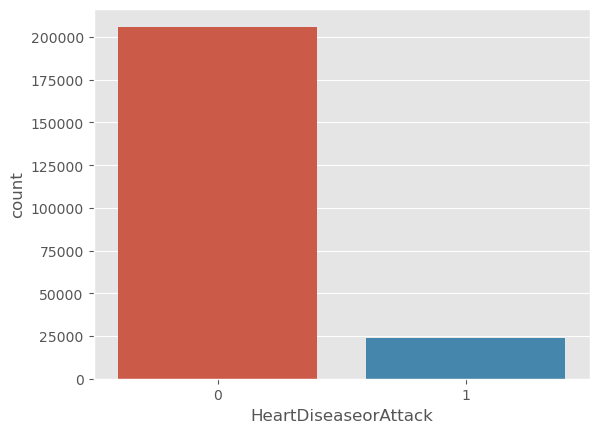

In [16]:
sns.countplot(data = df , x = 'HeartDiseaseorAttack' )
plt.show()

people with no Heart Disease or Attack : above 200000  
people with Heart Disease or Attack : 25000

#### Visualizing the Distribution of all variables in the dataset

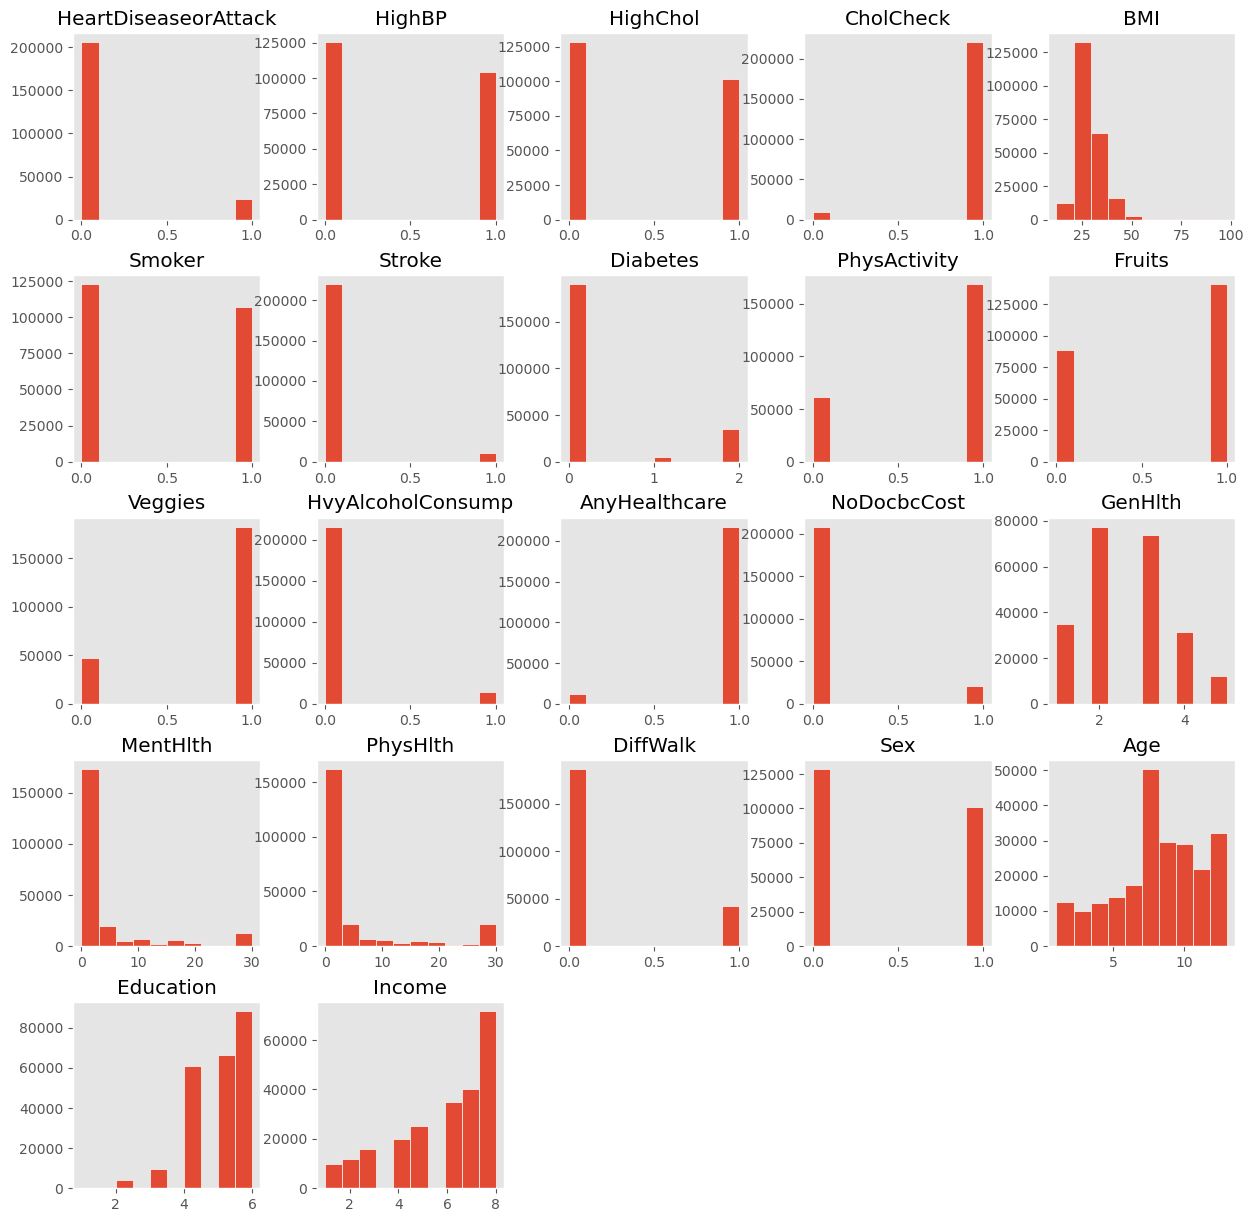

In [17]:
df.hist(edgecolor = 'white', figsize = (15, 15), grid = False)
plt.show()

#### Key insights :
+ HighBP : Patients with no HighBP(125000) are more comparing to Patients with HighBP(near to 100000)
+ HighChol : Patients with no HighChol(125000) are more comparing to Patients with HighChol(100000)
+ CholCheck : Most of the patients have regular choloestrol check with above 200000 in the observation
+ BMI : BMI of patients are some what normally distributed with less variance
+ Smoker : Patients who were non Smokers(near to 125000) are more comparing to Patients who are Smokers(above 100000)
+ Stoke : Most of the patients were never faced any heart strokes previously(above 200000)
+ Diabetes : Patients with no diabetes(above 150000) are more compare to other categories
+ PhysActivity : Patients who were actively involve physical activities(above 150000) are more compare to others who were not involved in physical activities(above 50000)
+ Fruits : Patients with consumption of fruits(above 125000) are more compare to non consumers of fruits(above 75000)
+ Veggies : Veggies following the same trend as fruits were consumers are more(150000) compare to non consumers(near to 50000)
+ HvyAlcoholConsump : Non consumers of alcohols are more(above 200000) compare to consumers(below 50000)
+ AnyHealthcare : Patients with any health care plans(above 200000) are more compare to others(below 50000)
+ NoDocbcCost : Patients with NoDocbcCost(above 200000) are more compare to others(below 50000)
+ DiffWalk : Patients without any problems while walking or climbing stairs(above 150000) are more compare to others who were facing problem(below 50000)

+ Most of the variables are categorical.
+ Since some class may be less in the dataset and can be neglegible while visualization

Verifying the Number of Classes or Categories in the dataset

In [18]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("\n")

HeartDiseaseorAttack
[0 1]


HighBP
[1. 0.]


HighChol
[1. 0.]


CholCheck
[1. 0.]


BMI
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]


Smoker
[1. 0.]


Stroke
[0. 1.]


Diabetes
[0. 2. 1.]


PhysActivity
[0. 1.]


Fruits
[0. 1.]


Veggies
[1. 0.]


HvyAlcoholConsump
[0. 1.]


AnyHealthcare
[1. 0.]


NoDocbcCost
[0. 1.]


GenHlth
[5. 3. 2. 4. 1.]


MentHlth
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]


PhysHlth
[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]


DiffWalk
[1. 0.]


Sex
[0. 1.]


Age
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12

Converting categories from float to integer

In [19]:
var_list = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "Diabetes", "PhysActivity", "Fruits", \
            "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex"]
for i in var_list:
    df[i] = df[i].astype("int64")

In [20]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18.0,15.0,1,0,9.0,4.0,3.0
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0.0,0.0,0,0,7.0,6.0,1.0
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30.0,30.0,1,0,9.0,4.0,8.0
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0.0,0.0,0,0,11.0,3.0,6.0
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3.0,0.0,0,0,11.0,5.0,4.0


#### Relationship between Heart Disease or Attack with Other variables

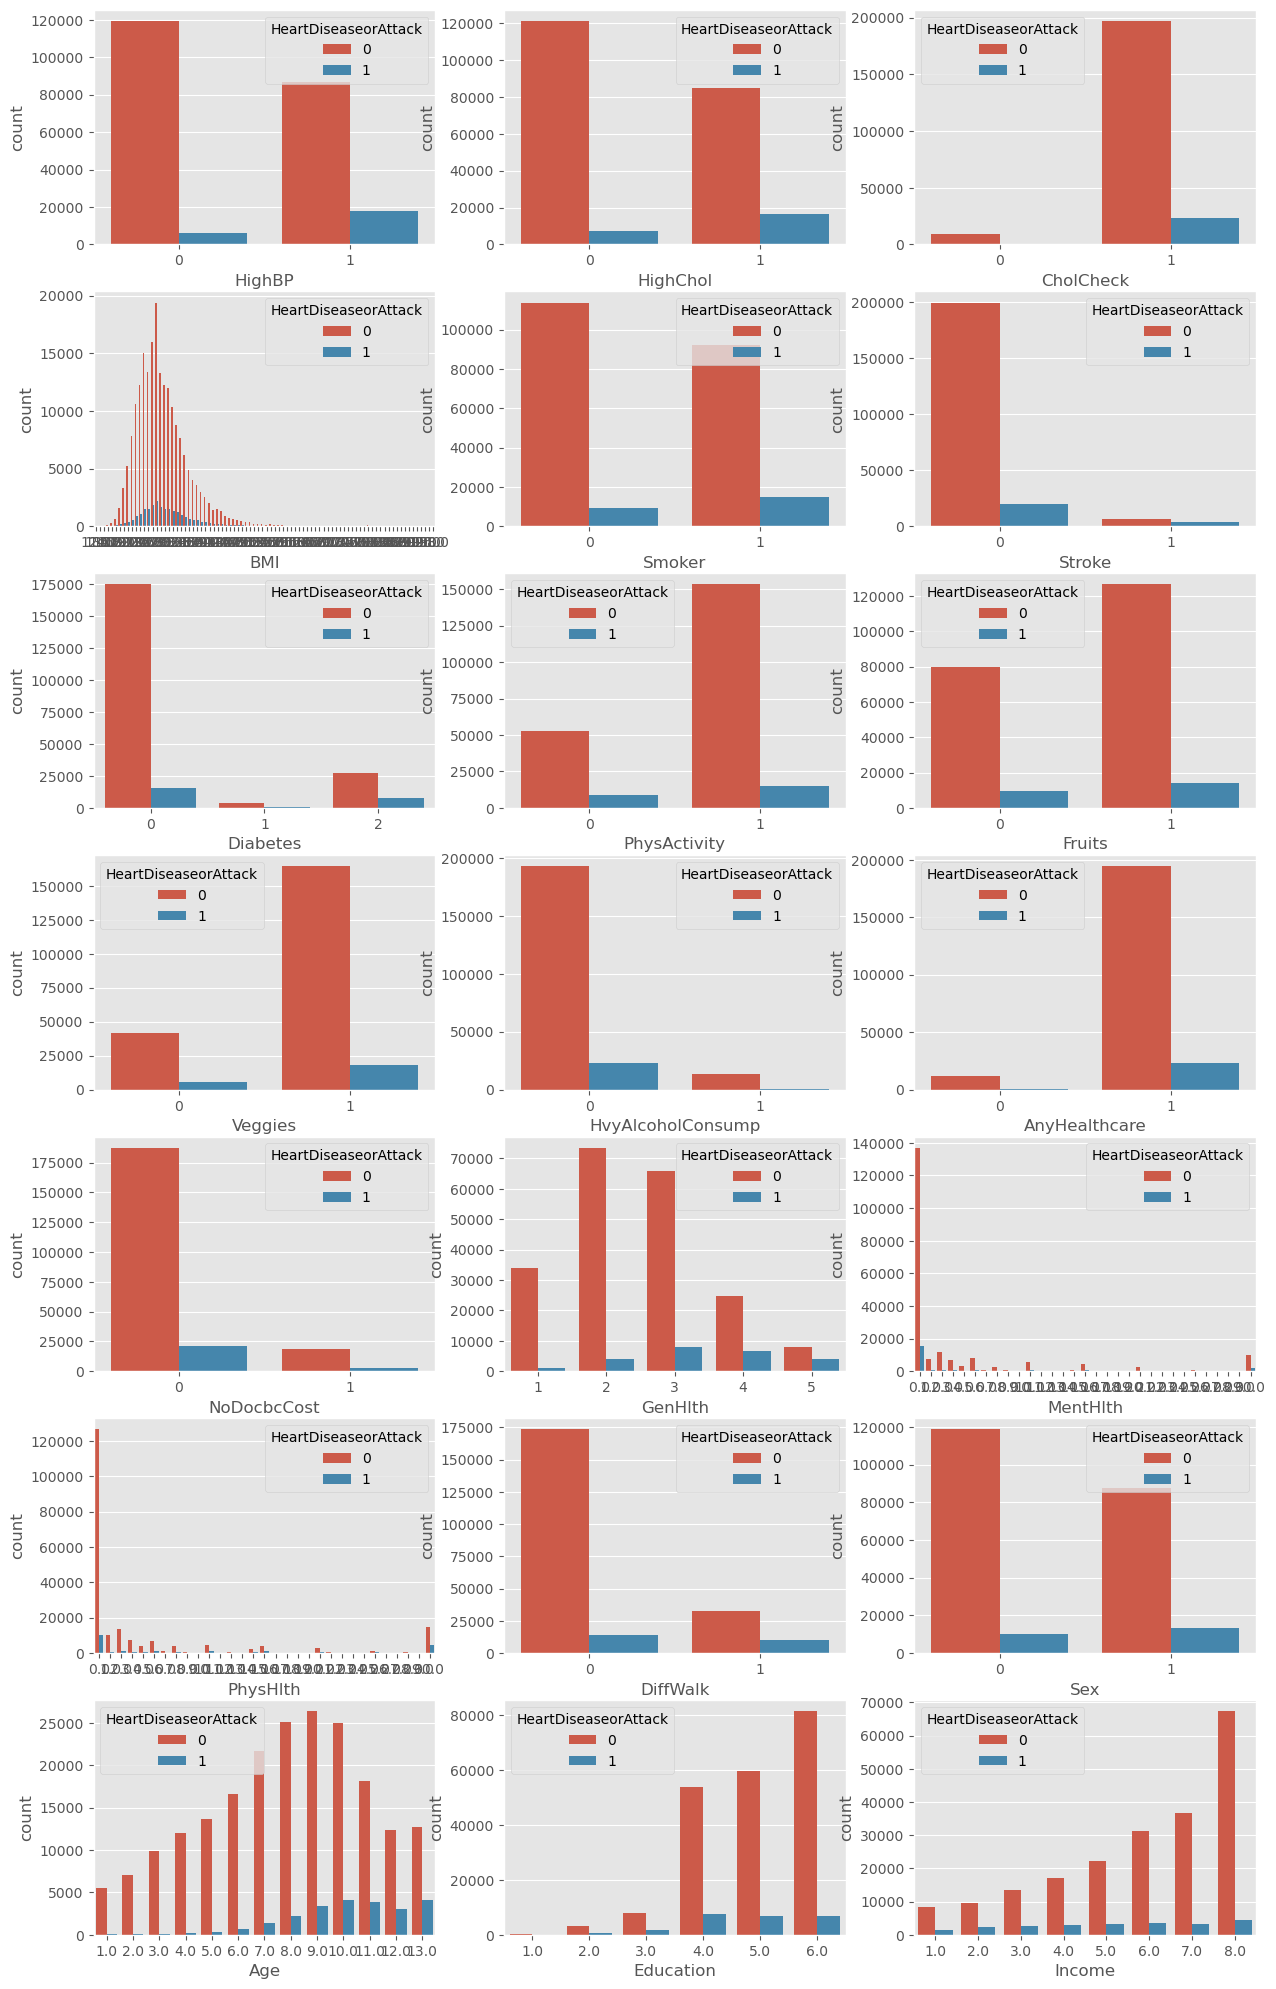

In [21]:
features = list(df.iloc[:, 1:].columns)
plt.figure(figsize = (15, 25))
for i in enumerate(features):
    plt.subplot(7,3, i[0] + 1)
    sns.countplot(x = i[1], hue = "HeartDiseaseorAttack", data = df)

As seen patients who were survived(0 - red) from heart disease are more compare to others who were not surived(1 - blue)

In [22]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18.0,15.0,1,0,9.0,4.0,3.0
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0.0,0.0,0,0,7.0,6.0,1.0
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30.0,30.0,1,0,9.0,4.0,8.0
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0.0,0.0,0,0,11.0,3.0,6.0
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3.0,0.0,0,0,11.0,5.0,4.0


#### Visulizing the relationship of all variables with all other variables

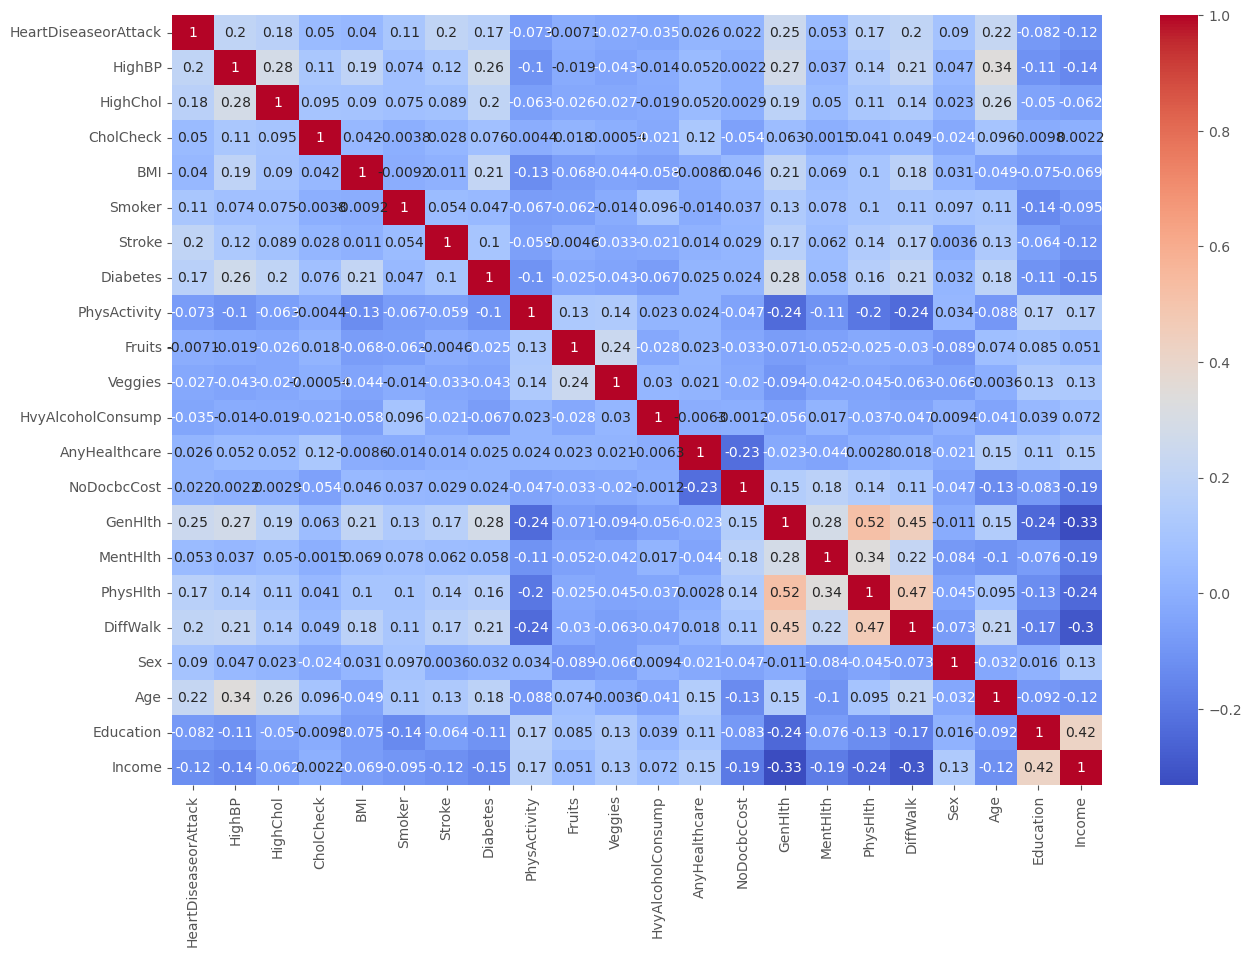

In [23]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.show()

+ Most of the variables does not have any strong corelation between them
+ variables like GenHlth has some strong correlation with PhysHlth, DiffWalk and Education with income compare to other variables(But not much better for stronger correlation)

#### Outlier Detection

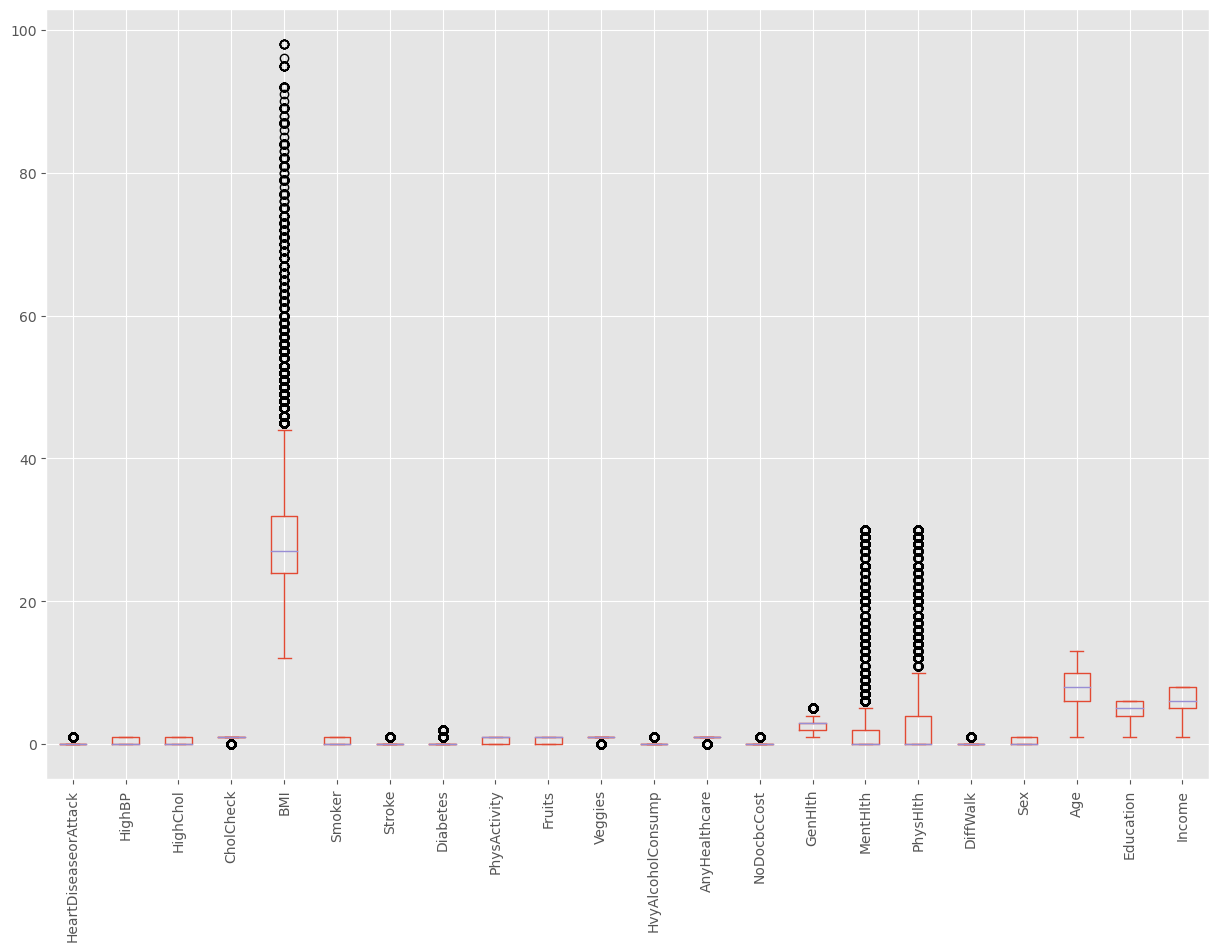

In [24]:
df.plot(kind = "box", figsize = (15, 10))
plt.xticks(rotation = 90)
plt.show()

Features like BMI, MentHlth and PhysHlth consist more number of outliers that it covers almost large portion of the dataset

Outliers can be handled using IQR method

In [25]:
Q1 = df["MentHlth"].quantile(0.25)
Q3 = df["MentHlth"].quantile(0.75)
Q1, Q3

(0.0, 2.0)

In [26]:
IQR = Q3 - Q1
IQR

2.0

In [27]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-3.0, 5.0)

In [28]:
newdf = df[(df["MentHlth"] < lower_limit) | (df["MentHlth"] > upper_limit)]

In [29]:
newdf.shape

(36163, 22)

In [30]:
df.shape

(229781, 22)

Since dropping outlier from the data causes losing of major portion of data due to this we can lose most of key insights from the data, as we can see number of rows were dropped from 229781 to 36163, therefore we proceed to futher process without dropping outliers

### Splitting the data in predictor and target variables

In [31]:
x = df.iloc[:, 1:-1]
y = df.iloc[:, 0]

### Splitting data into training and testing set

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [33]:
print("Size of x_train : ", x_train.shape[0])
print("Size of x_test : ", x_test.shape[0])
print("Size of y_train : ", y_train.shape[0])
print("Size of y_test : ", y_test.shape[0])

Size of x_train :  183824
Size of x_test :  45957
Size of y_train :  183824
Size of y_test :  45957


### Feature Scaling of train and test set

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Fitting
#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test)

In [37]:
model_accuracy = []

In [38]:
from sklearn.metrics import accuracy_score
log_reg = accuracy_score(y_test, y_pred)
model_accuracy.append(int(log_reg * 100))
print(model_accuracy)

[90]


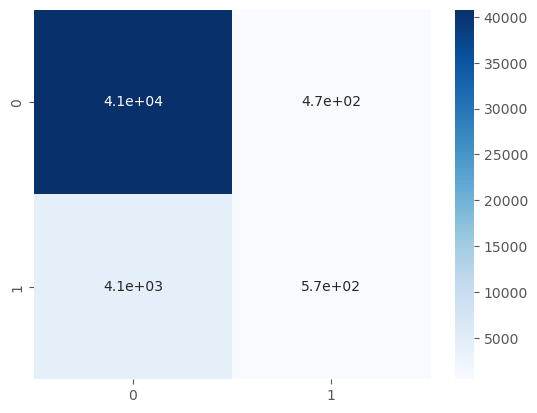

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "Blues")
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     41269
           1       0.55      0.12      0.20      4688

    accuracy                           0.90     45957
   macro avg       0.73      0.56      0.57     45957
weighted avg       0.87      0.90      0.87     45957



#### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
dc_ypred = dc.predict(x_test)

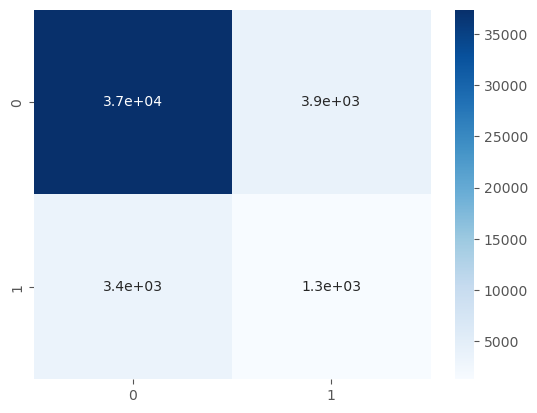

In [43]:
sns.heatmap(confusion_matrix(y_test, dc_ypred), annot = True, cmap = "Blues")
plt.show()

In [44]:
dtree = accuracy_score(y_test, dc_ypred)
model_accuracy.append(int(dtree * 100))
print(model_accuracy[1])

84


In [45]:
print(classification_report(y_test, dc_ypred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     41269
           1       0.25      0.27      0.26      4688

    accuracy                           0.84     45957
   macro avg       0.58      0.59      0.58     45957
weighted avg       0.85      0.84      0.84     45957



#### K Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [47]:
k_ypred = knn.predict(x_test)

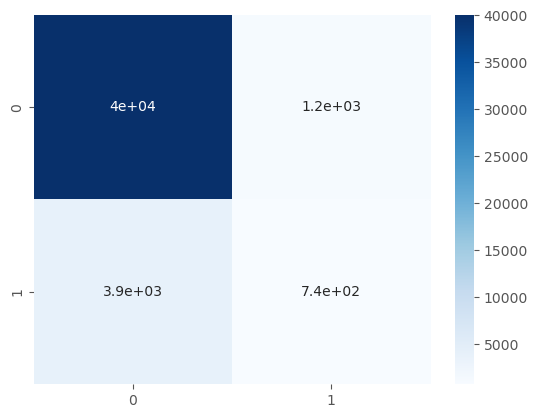

In [48]:
sns.heatmap(confusion_matrix(y_test, k_ypred), annot = True, cmap = "Blues")
plt.show()

In [49]:
knn_model = accuracy_score(y_test, k_ypred)
model_accuracy.append(int(knn_model * 100))
print(model_accuracy[2])

88


In [50]:
print(classification_report(y_test, k_ypred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     41269
           1       0.38      0.16      0.22      4688

    accuracy                           0.89     45957
   macro avg       0.65      0.56      0.58     45957
weighted avg       0.86      0.89      0.87     45957



### Model Selection

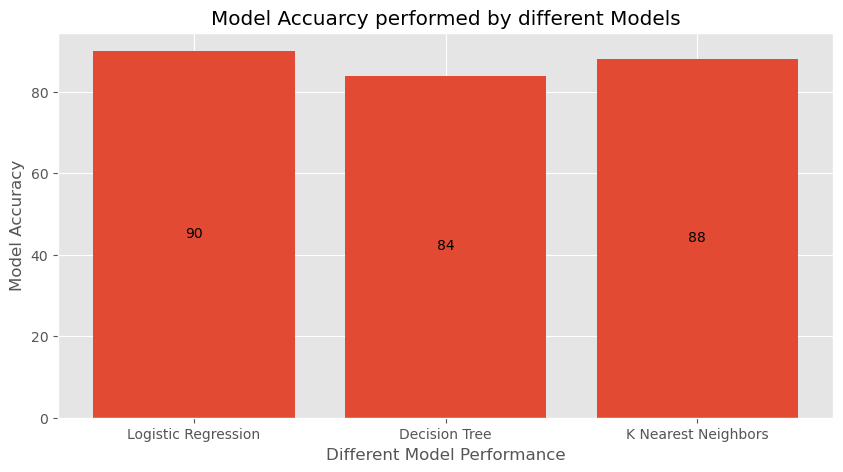

In [51]:
plt.figure(figsize = (10,5))
model_fig = plt.bar(["Logistic Regression", "Decision Tree", "K Nearest Neighbors"],model_accuracy)
plt.bar_label(model_fig, labels = model_accuracy, label_type = "center", padding = 1,)
plt.title("Model Accuarcy performed by different Models")
plt.xlabel("Different Model Performance")
plt.ylabel("Model Accuracy")
plt.show()

Logistic Regression Performs better compare to other models  
Therefore we proceed with Logistic Regression model for Hyperparameter Tuning to generalize its prediction capability

### Hyperparameter Tuning of Best Model

In [52]:
param_grid = {
    'penalty':['l2'],
    'C' : [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs','newton-cg','sag'],
    'max_iter'  : [100, 500, 1000]
}


In [53]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 5,
    n_jobs = -1
)

In [54]:
grid_search.fit(x_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


In [55]:
Y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.9001457884544248


In [56]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     41269
           1       0.55      0.12      0.20      4688

    accuracy                           0.90     45957
   macro avg       0.73      0.55      0.57     45957
weighted avg       0.87      0.90      0.87     45957



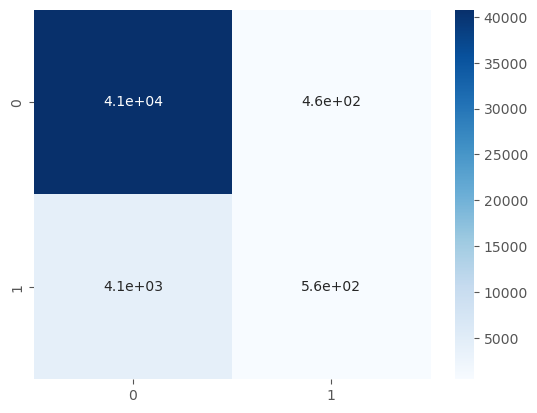

In [57]:
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, cmap = "Blues")
plt.show()

### Conclusion:
Logistic Regression model is been optimized efficiently with 90% accuracy even after Hyperparameter tuning.